In [22]:
import numpy as np
import pandas as pd
from time import time
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, log_loss, brier_score_loss
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.calibration import CalibratedClassifierCV
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg')
%matplotlib inline
plt.style.use('ggplot')

from features.data_provider import get_train_and_test_dataset, get_feature_columns, get_whole_dataset, set_feature_columns, feature_columns
from models.helpers import get_feature_importance
from models.one_vs_all_model import get_home, get_draw, get_away
from simulation.predictor import OneVsRestPredictor
from notebook_helpers import get_tournament_simulation_results, plot_bank_and_bets, get_accuracy
from notebook_helpers import get_onevsrest_dataset, plot_reliability_diagram, plot_simulation

ImportError: cannot import name 'get_accuracy'

In [ ]:
param_grid = {'max_depth': [3, 5, 8, 12, None], 
              'min_samples_leaf': [1, 3, 5, 10, 15],
              'max_features': ["sqrt", "log2"]}
params = {"oob_score":True, "bootstrap":True, "n_jobs":-1, "n_estimators": 1000} 

# Home win vs rest

In [ ]:
X_train, y_train, X_test, y_test = get_onevsrest_dataset(1)

In [ ]:
optimal_params = {'max_depth': 8,
 'max_features': 'sqrt',
 'min_samples_leaf': 10,
 'oob_score': True,
 'bootstrap': True,
 'n_jobs': -1,
 'n_estimators': 5000}

rfc_home = RandomForestClassifier(**optimal_params)
rfc_home.fit(X_train, y_train)
probas = rfc_home.predict_proba(X_test)
plot_reliability_diagram(probas, y_test.as_matrix())

In [ ]:
rfr_sigmoid_home = CalibratedClassifierCV(rfc_home, cv=10, method='sigmoid')
rfr_sigmoid_home.fit(X_train, y_train)
probas = rfr_sigmoid_home.predict_proba(X_test)
plot_reliability_diagram(probas, y_test.as_matrix())

In [ ]:
rfr_isotonic_home = CalibratedClassifierCV(rfc_home, cv=10, method='isotonic')
rfr_isotonic_home.fit(X_train, y_train)
probas = rfr_isotonic_home.predict_proba(X_test)
plot_reliability_diagram(probas, y_test.as_matrix())

# Draw vs rest

In [ ]:
X_train, y_train, X_test, y_test = get_onevsrest_dataset(0)

In [ ]:
optimal_params = {'max_depth': 3,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'oob_score': True,
 'bootstrap': True,
 'n_jobs': -1,
 'n_estimators': 5000}

rfc_draw = RandomForestClassifier(**optimal_params)
rfc_draw.fit(X_train, y_train)
probas = rfc_draw.predict_proba(X_test)
plot_reliability_diagram(probas, y_test.as_matrix())

In [ ]:
rfr_sigmoid_draw = CalibratedClassifierCV(rfc_draw, cv=10, method='sigmoid')
rfr_sigmoid_draw.fit(X_train, y_train)
probas = rfr_sigmoid_draw.predict_proba(X_test)
plot_reliability_diagram(probas, y_test.as_matrix())

In [ ]:
rfr_isotonic_draw = CalibratedClassifierCV(rfc_draw, cv=10, method='isotonic')
rfr_isotonic_draw.fit(X_train, y_train)
probas = rfr_isotonic_draw.predict_proba(X_test)
plot_reliability_diagram(probas, y_test.as_matrix())

# Away win vs rest

In [ ]:
X_train, y_train, X_test, y_test = get_onevsrest_dataset(-1)

In [ ]:
optimal_params = {'max_depth': 5,
 'max_features': 'sqrt',
 'min_samples_leaf': 15,
 'oob_score': True,
 'bootstrap': True,
 'n_jobs': -1,
 'n_estimators': 5000}

rfc_away = RandomForestClassifier(**optimal_params)
rfc_away.fit(X_train, y_train)
probas = rfc_away.predict_proba(X_test)
plot_reliability_diagram(probas, y_test.as_matrix())

In [ ]:
rfr_sigmoid_away = CalibratedClassifierCV(rfc_away, cv=10, method='sigmoid')
rfr_sigmoid_away.fit(X_train, y_train)
probas = rfr_sigmoid_away.predict_proba(X_test)
plot_reliability_diagram(probas, y_test.as_matrix())

In [ ]:
rfr_isotonic_away = CalibratedClassifierCV(rfc_away, cv=10, method='isotonic')
rfr_isotonic_away.fit(X_train, y_train)
probas = rfr_isotonic_away.predict_proba(X_test)
plot_reliability_diagram(probas, y_test.as_matrix())

# WC Prediction

In [5]:
set_feature_columns(feature_columns)
results = {}

# Predict World Cup 2018

In [6]:
X, y = get_whole_dataset("home_win")
tournament_template_file = 'data/original/wc_2018_games_real.csv'
match_bet_file = 'data/original/wc_2018_bets.csv'

Model type: Home, model calibration: None, parameters: {'oob_score': True, 'bootstrap': True, 'n_jobs': -1, 'n_estimators': 2000, 'max_depth': 8, 'min_samples_leaf': 10, 'max_features': 'sqrt'}
Model type: Draw, model calibration: None, parameters: {'oob_score': True, 'bootstrap': True, 'n_jobs': -1, 'n_estimators': 2000, 'max_depth': 3, 'min_samples_leaf': 1, 'max_features': 'sqrt'}
Model type: Away, model calibration: None, parameters: {'oob_score': True, 'bootstrap': True, 'n_jobs': -1, 'n_estimators': 2000, 'max_depth': 5, 'min_samples_leaf': 15, 'max_features': 'sqrt'}


/Users/villetoiviainen/Documents/dev/world_cup/bet/kelly_strategy.py:12: RuntimeWarning: invalid value encountered in log
  return -(p1 * np.log(1 + o1*a - b - c) + p2 * np.log(1 + o2*b - a - c) + p3*np.log(1 + o3*c - a - b))


Accuracy: 0.578125


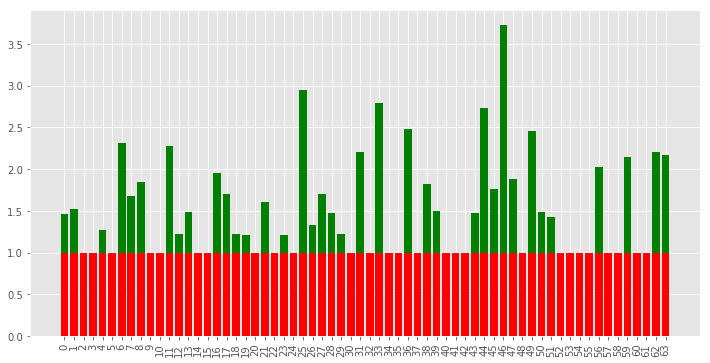

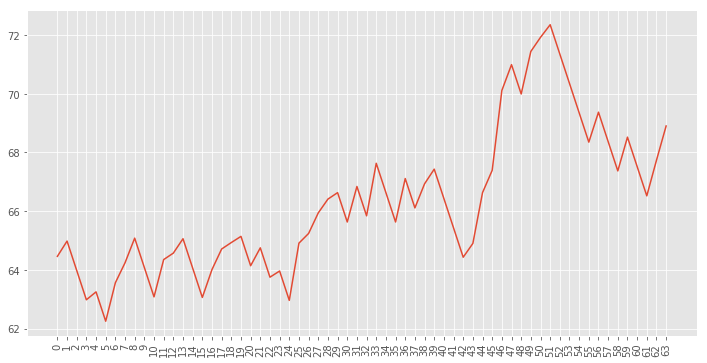

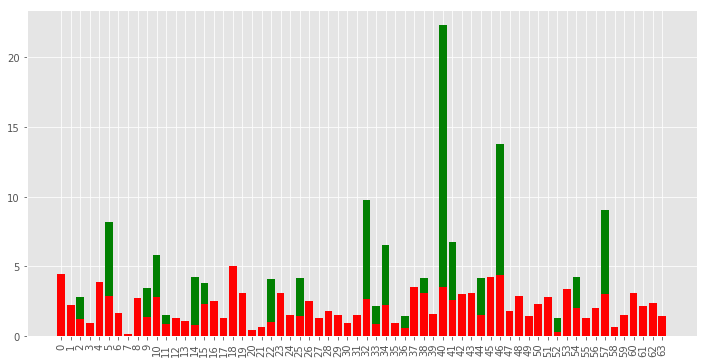

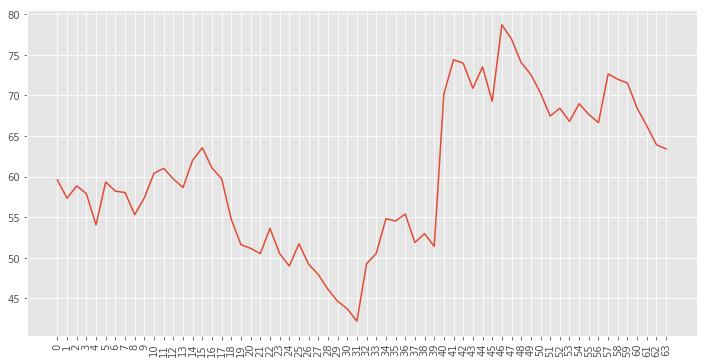

In [7]:
home_model = get_home(X=X, y=fix_label(y, 1), n_estimators=2000)
draw_model = get_draw(X=X, y=fix_label(y, 0), n_estimators=2000)
away_model = get_away(X=X, y=fix_label(y, -1), n_estimators=2000)

tournament_template = pd.read_csv(tournament_template_file)
match_bets = pd.read_csv(match_bet_file)
predictor = OneVsRestPredictor(home_model, draw_model, away_model)
wc2018 = get_tournament_simulation_results(tournament_template, predictor, match_bets[["1", "X", "2"]].values)

tmp = {}
tmp["simulation"] = wc2018[0]
tmp["unit"] = wc2018[1]
tmp["kelly"] = wc2018[2]
results["WC2018"] = tmp

plot_simulation(tmp)

Model type: Home, model calibration: sigmoid, parameters: {'oob_score': True, 'bootstrap': True, 'n_jobs': -1, 'n_estimators': 2000, 'max_depth': 8, 'min_samples_leaf': 10, 'max_features': 'sqrt'}
Model type: Draw, model calibration: sigmoid, parameters: {'oob_score': True, 'bootstrap': True, 'n_jobs': -1, 'n_estimators': 2000, 'max_depth': 3, 'min_samples_leaf': 1, 'max_features': 'sqrt'}
Model type: Away, model calibration: sigmoid, parameters: {'oob_score': True, 'bootstrap': True, 'n_jobs': -1, 'n_estimators': 2000, 'max_depth': 5, 'min_samples_leaf': 15, 'max_features': 'sqrt'}


/Users/villetoiviainen/Documents/dev/world_cup/bet/kelly_strategy.py:12: RuntimeWarning: invalid value encountered in log
  return -(p1 * np.log(1 + o1*a - b - c) + p2 * np.log(1 + o2*b - a - c) + p3*np.log(1 + o3*c - a - b))


Accuracy: 0.578125


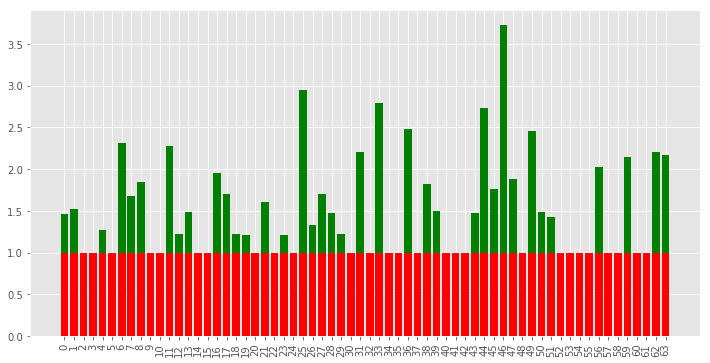

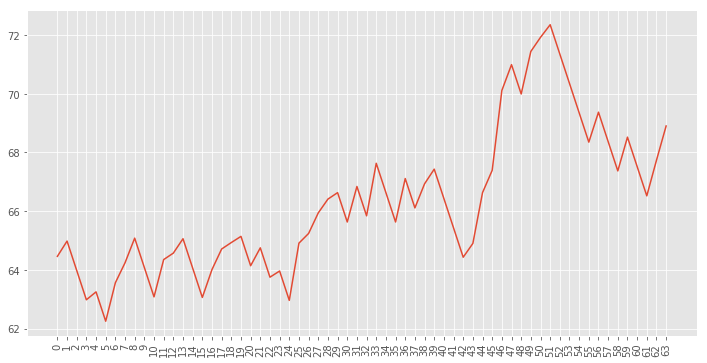

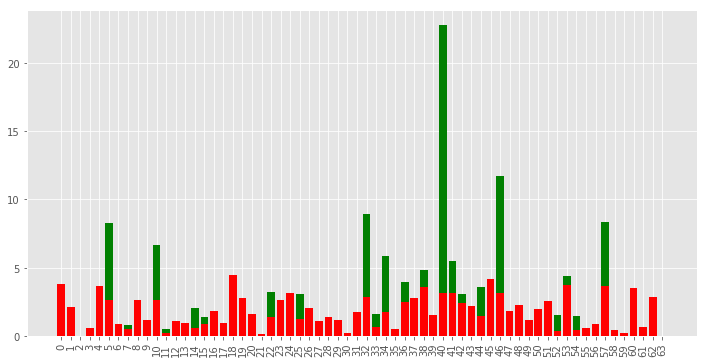

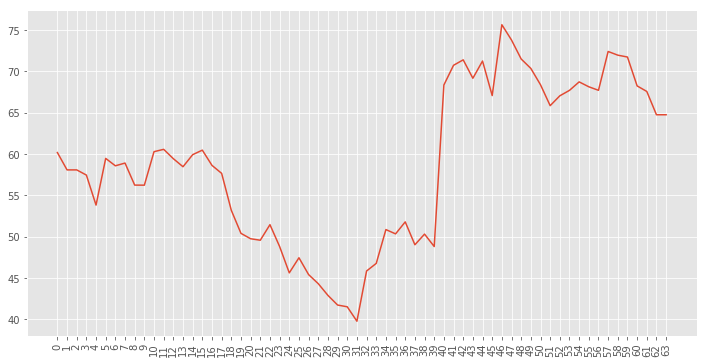

In [8]:
home_model = get_home(calibration="sigmoid", X=X, y=fix_label(y, 1), n_estimators=2000)
draw_model = get_draw(calibration="sigmoid", X=X, y=fix_label(y, 0), n_estimators=2000)
away_model = get_away(calibration="sigmoid", X=X, y=fix_label(y, -1), n_estimators=2000)

tournament_template = pd.read_csv(tournament_template_file)
match_bets = pd.read_csv(match_bet_file)
predictor = OneVsRestPredictor(home_model, draw_model, away_model)
wc2018 = get_tournament_simulation_results(tournament_template, predictor, match_bets[["1", "X", "2"]].values)

tmp = {}
tmp["simulation"] = wc2018[0]
tmp["unit"] = wc2018[1]
tmp["kelly"] = wc2018[2]
results["WC2018_sigmoid"] = tmp

plot_simulation(tmp)

Model type: Home, model calibration: isotonic, parameters: {'oob_score': True, 'bootstrap': True, 'n_jobs': -1, 'n_estimators': 2000, 'max_depth': 8, 'min_samples_leaf': 10, 'max_features': 'sqrt'}
Model type: Draw, model calibration: isotonic, parameters: {'oob_score': True, 'bootstrap': True, 'n_jobs': -1, 'n_estimators': 2000, 'max_depth': 3, 'min_samples_leaf': 1, 'max_features': 'sqrt'}
Model type: Away, model calibration: isotonic, parameters: {'oob_score': True, 'bootstrap': True, 'n_jobs': -1, 'n_estimators': 2000, 'max_depth': 5, 'min_samples_leaf': 15, 'max_features': 'sqrt'}


/Users/villetoiviainen/Documents/dev/world_cup/bet/kelly_strategy.py:12: RuntimeWarning: invalid value encountered in log
  return -(p1 * np.log(1 + o1*a - b - c) + p2 * np.log(1 + o2*b - a - c) + p3*np.log(1 + o3*c - a - b))


Accuracy: 0.578125


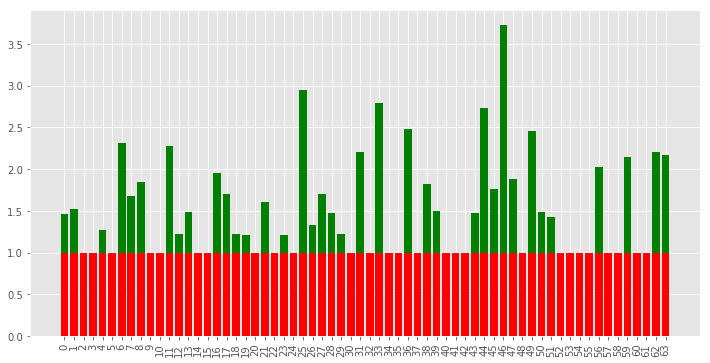

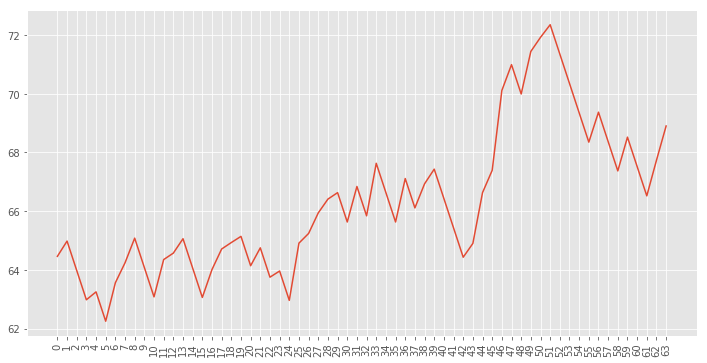

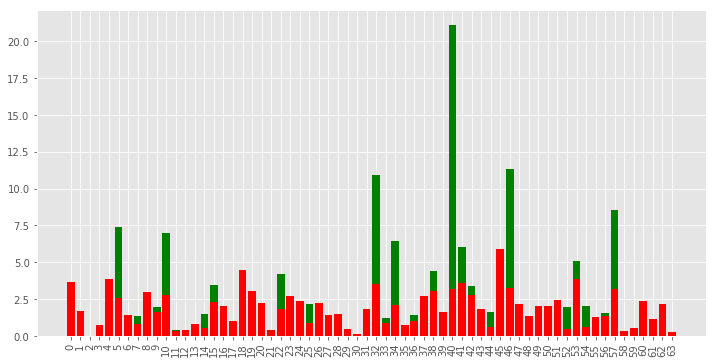

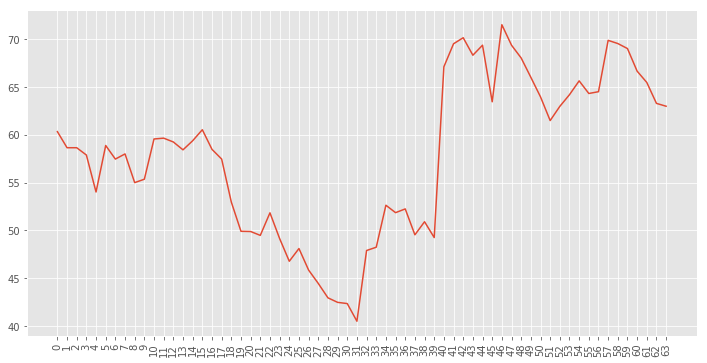

In [9]:
home_model = get_home(calibration="isotonic", X=X, y=fix_label(y, 1), n_estimators=2000)
draw_model = get_draw(calibration="isotonic", X=X, y=fix_label(y, 0), n_estimators=2000)
away_model = get_away(calibration="isotonic", X=X, y=fix_label(y, -1), n_estimators=2000)

tournament_template = pd.read_csv(tournament_template_file)
match_bets = pd.read_csv(match_bet_file)
predictor = OneVsRestPredictor(home_model, draw_model, away_model)
wc2018 = get_tournament_simulation_results(tournament_template, predictor, match_bets[["1", "X", "2"]].values)

tmp = {}
tmp["simulation"] = wc2018[0]
tmp["unit"] = wc2018[1]
tmp["kelly"] = wc2018[2]
results["WC2018_isotonic"] = tmp

plot_simulation(tmp)

# Predict World Cup 2014

In [14]:
X, y = get_whole_dataset("home_win", filter_start="2014-06-12")
tournament_template_file = 'data/original/wc_2014_games_real.csv'
match_bet_file = 'data/original/wc_2014_bets.csv'

Model type: Home, model calibration: None, parameters: {'oob_score': True, 'bootstrap': True, 'n_jobs': -1, 'n_estimators': 2000, 'max_depth': 8, 'min_samples_leaf': 10, 'max_features': 'sqrt'}
Model type: Draw, model calibration: None, parameters: {'oob_score': True, 'bootstrap': True, 'n_jobs': -1, 'n_estimators': 2000, 'max_depth': 3, 'min_samples_leaf': 1, 'max_features': 'sqrt'}
Model type: Away, model calibration: None, parameters: {'oob_score': True, 'bootstrap': True, 'n_jobs': -1, 'n_estimators': 2000, 'max_depth': 5, 'min_samples_leaf': 15, 'max_features': 'sqrt'}


/Users/villetoiviainen/Documents/dev/world_cup/bet/kelly_strategy.py:12: RuntimeWarning: invalid value encountered in log
  return -(p1 * np.log(1 + o1*a - b - c) + p2 * np.log(1 + o2*b - a - c) + p3*np.log(1 + o3*c - a - b))


Accuracy: 0.609375


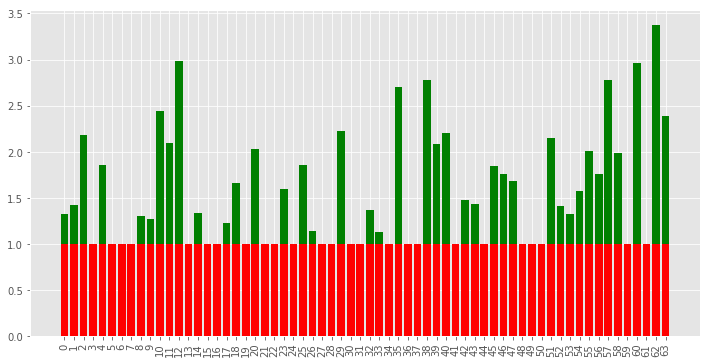

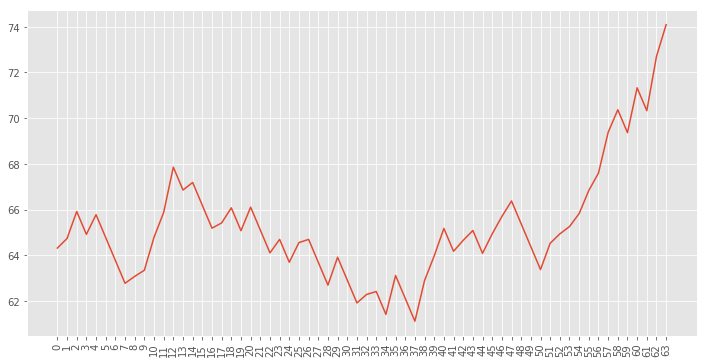

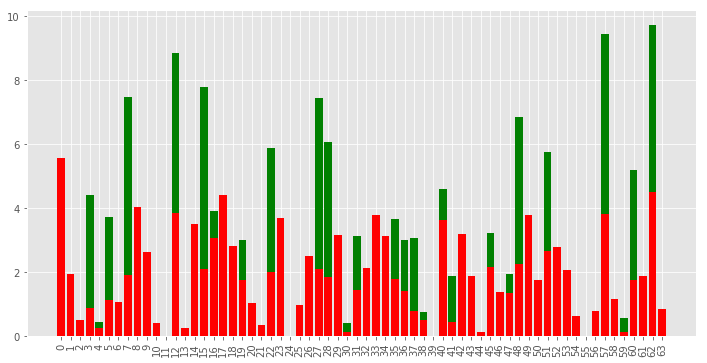

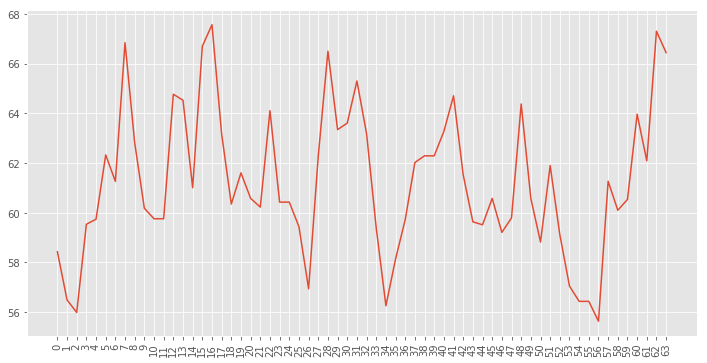

In [15]:
home_model = get_home(X=X, y=fix_label(y, 1), n_estimators=2000)
draw_model = get_draw(X=X, y=fix_label(y, 0), n_estimators=2000)
away_model = get_away(X=X, y=fix_label(y, -1), n_estimators=2000)

tournament_template = pd.read_csv(tournament_template_file)
match_bets = pd.read_csv(match_bet_file)
predictor = OneVsRestPredictor(home_model, draw_model, away_model)
wc2014 = get_tournament_simulation_results(tournament_template, predictor, match_bets[["1", "X", "2"]].values)

tmp = {}
tmp["simulation"] = wc2014[0]
tmp["unit"] = wc2014[1]
tmp["kelly"] = wc2014[2]
results["WC2014"] = tmp

plot_simulation(tmp)

Model type: Home, model calibration: sigmoid, parameters: {'oob_score': True, 'bootstrap': True, 'n_jobs': -1, 'n_estimators': 2000, 'max_depth': 8, 'min_samples_leaf': 10, 'max_features': 'sqrt'}
Model type: Draw, model calibration: sigmoid, parameters: {'oob_score': True, 'bootstrap': True, 'n_jobs': -1, 'n_estimators': 2000, 'max_depth': 3, 'min_samples_leaf': 1, 'max_features': 'sqrt'}
Model type: Away, model calibration: sigmoid, parameters: {'oob_score': True, 'bootstrap': True, 'n_jobs': -1, 'n_estimators': 2000, 'max_depth': 5, 'min_samples_leaf': 15, 'max_features': 'sqrt'}


/Users/villetoiviainen/Documents/dev/world_cup/bet/kelly_strategy.py:12: RuntimeWarning: invalid value encountered in log
  return -(p1 * np.log(1 + o1*a - b - c) + p2 * np.log(1 + o2*b - a - c) + p3*np.log(1 + o3*c - a - b))


Accuracy: 0.578125


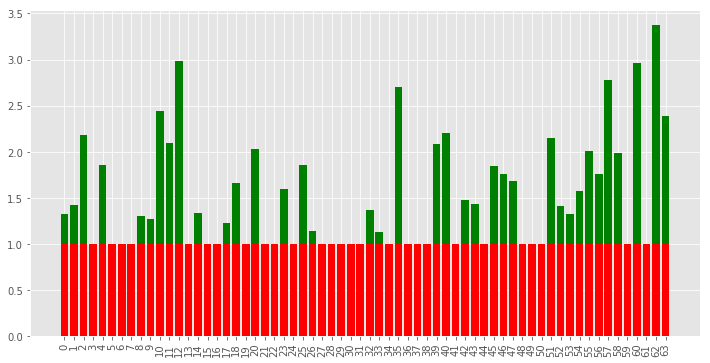

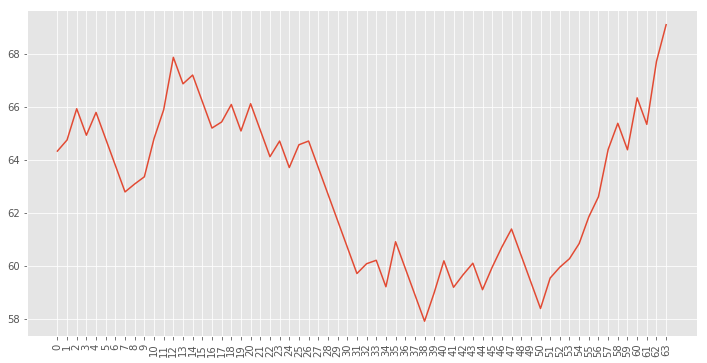

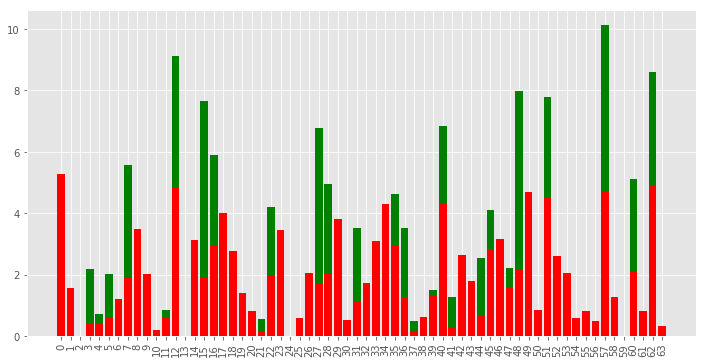

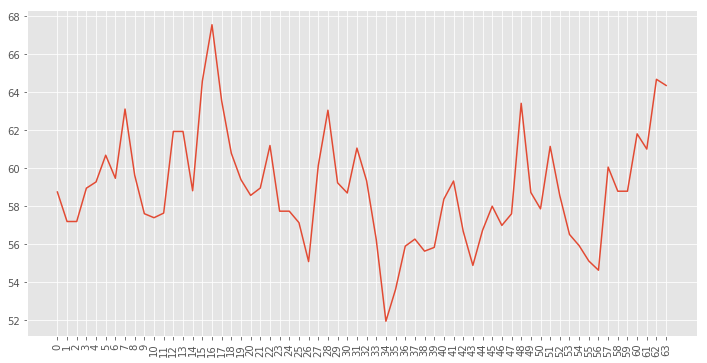

In [16]:
home_model = get_home(calibration="sigmoid", X=X, y=fix_label(y, 1), n_estimators=2000)
draw_model = get_draw(calibration="sigmoid", X=X, y=fix_label(y, 0), n_estimators=2000)
away_model = get_away(calibration="sigmoid", X=X, y=fix_label(y, -1), n_estimators=2000)

tournament_template = pd.read_csv(tournament_template_file)
match_bets = pd.read_csv(match_bet_file)
predictor = OneVsRestPredictor(home_model, draw_model, away_model)
wc2014 = get_tournament_simulation_results(tournament_template, predictor, match_bets[["1", "X", "2"]].values)

tmp = {}
tmp["simulation"] = wc2014[0]
tmp["unit"] = wc2014[1]
tmp["kelly"] = wc2014[2]
results["WC2014_sigmoid"] = tmp

plot_simulation(tmp)

Model type: Home, model calibration: isotonic, parameters: {'oob_score': True, 'bootstrap': True, 'n_jobs': -1, 'n_estimators': 2000, 'max_depth': 8, 'min_samples_leaf': 10, 'max_features': 'sqrt'}
Model type: Draw, model calibration: isotonic, parameters: {'oob_score': True, 'bootstrap': True, 'n_jobs': -1, 'n_estimators': 2000, 'max_depth': 3, 'min_samples_leaf': 1, 'max_features': 'sqrt'}
Model type: Away, model calibration: isotonic, parameters: {'oob_score': True, 'bootstrap': True, 'n_jobs': -1, 'n_estimators': 2000, 'max_depth': 5, 'min_samples_leaf': 15, 'max_features': 'sqrt'}
Accuracy: 0.59375


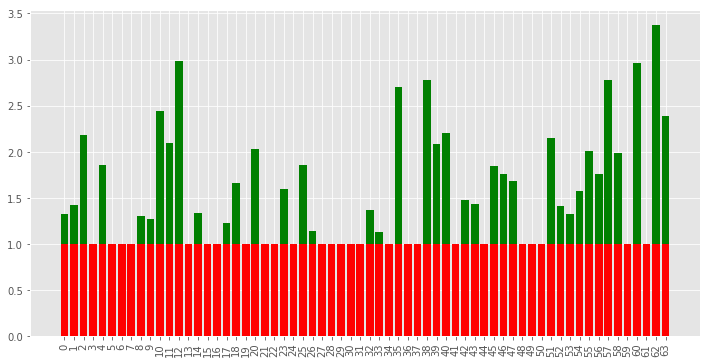

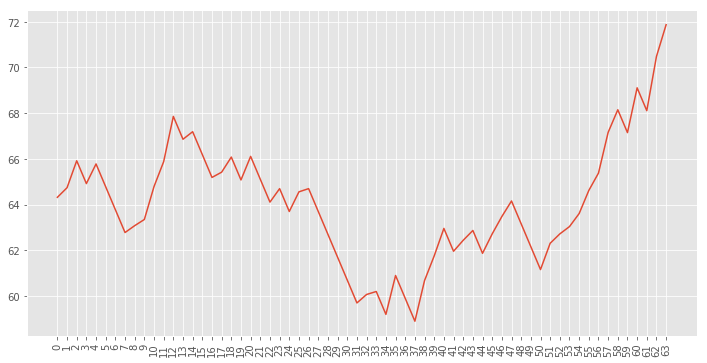

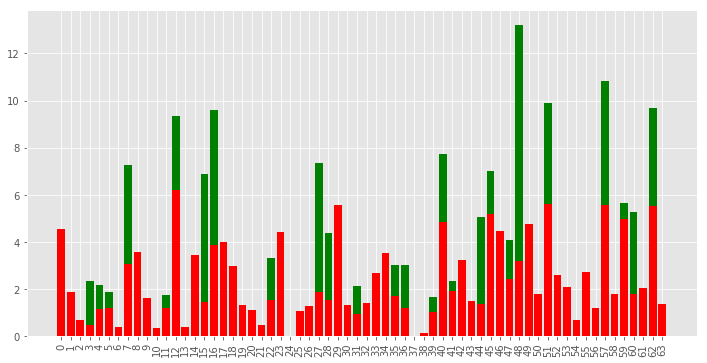

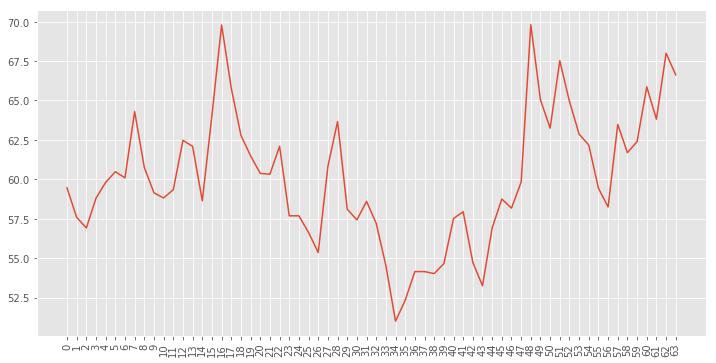

In [17]:
home_model = get_home(calibration="isotonic", X=X, y=fix_label(y, 1), n_estimators=2000)
draw_model = get_draw(calibration="isotonic", X=X, y=fix_label(y, 0), n_estimators=2000)
away_model = get_away(calibration="isotonic", X=X, y=fix_label(y, -1), n_estimators=2000)

tournament_template = pd.read_csv(tournament_template_file)
match_bets = pd.read_csv(match_bet_file)
predictor = OneVsRestPredictor(home_model, draw_model, away_model)
wc2014 = get_tournament_simulation_results(tournament_template, predictor, match_bets[["1", "X", "2"]].values)

tmp = {}
tmp["simulation"] = wc2014[0]
tmp["unit"] = wc2014[1]
tmp["kelly"] = wc2014[2]
results["WC2014_isotonic"] = tmp

plot_simulation(tmp)

# Predict World Cup 2010

In [18]:
X, y = get_whole_dataset("home_win", filter_start="2010-06-11")
tournament_template_file = 'data/original/wc_2010_games_real.csv'
match_bet_file = 'data/original/wc_2010_bets.csv'

Model type: Home, model calibration: None, parameters: {'oob_score': True, 'bootstrap': True, 'n_jobs': -1, 'n_estimators': 2000, 'max_depth': 8, 'min_samples_leaf': 10, 'max_features': 'sqrt'}
Model type: Draw, model calibration: None, parameters: {'oob_score': True, 'bootstrap': True, 'n_jobs': -1, 'n_estimators': 2000, 'max_depth': 3, 'min_samples_leaf': 1, 'max_features': 'sqrt'}
Model type: Away, model calibration: None, parameters: {'oob_score': True, 'bootstrap': True, 'n_jobs': -1, 'n_estimators': 2000, 'max_depth': 5, 'min_samples_leaf': 15, 'max_features': 'sqrt'}
Accuracy: 0.578125


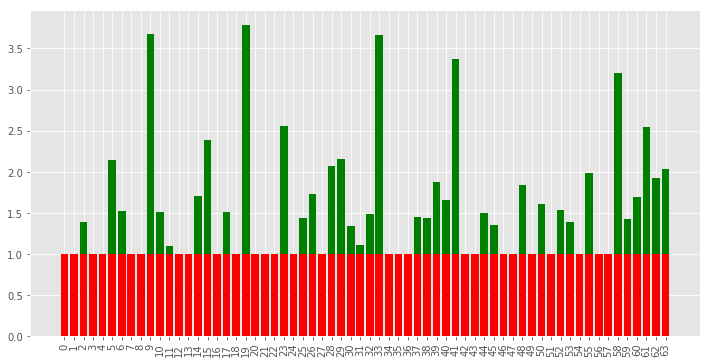

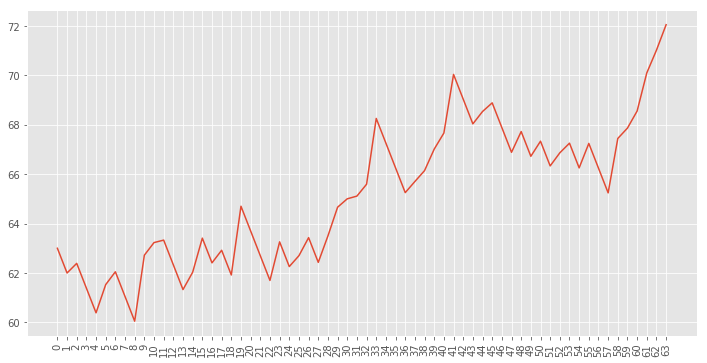

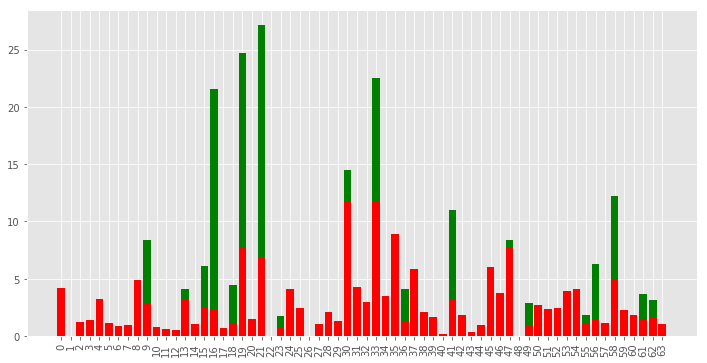

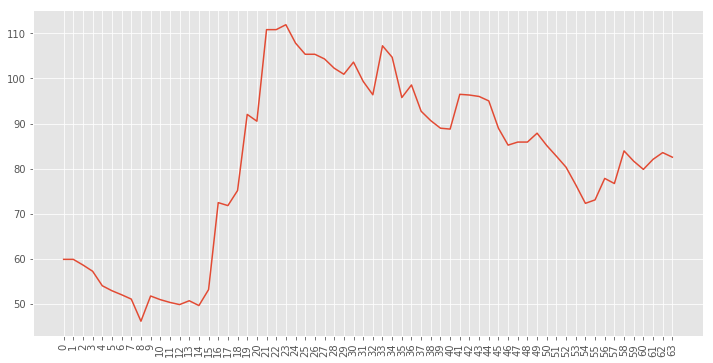

In [19]:
home_model = get_home(X=X, y=fix_label(y, 1), n_estimators=2000)
draw_model = get_draw(X=X, y=fix_label(y, 0), n_estimators=2000)
away_model = get_away(X=X, y=fix_label(y, -1), n_estimators=2000)

tournament_template = pd.read_csv(tournament_template_file)
match_bets = pd.read_csv(match_bet_file)
predictor = OneVsRestPredictor(home_model, draw_model, away_model)
wc2010 = get_tournament_simulation_results(tournament_template, predictor, match_bets[["1", "X", "2"]].values)

tmp = {}
tmp["simulation"] = wc2010[0]
tmp["unit"] = wc2010[1]
tmp["kelly"] = wc2010[2]
results["WC2010"] = tmp

plot_simulation(tmp)

Model type: Home, model calibration: sigmoid, parameters: {'oob_score': True, 'bootstrap': True, 'n_jobs': -1, 'n_estimators': 2000, 'max_depth': 8, 'min_samples_leaf': 10, 'max_features': 'sqrt'}
Model type: Draw, model calibration: sigmoid, parameters: {'oob_score': True, 'bootstrap': True, 'n_jobs': -1, 'n_estimators': 2000, 'max_depth': 3, 'min_samples_leaf': 1, 'max_features': 'sqrt'}
Model type: Away, model calibration: sigmoid, parameters: {'oob_score': True, 'bootstrap': True, 'n_jobs': -1, 'n_estimators': 2000, 'max_depth': 5, 'min_samples_leaf': 15, 'max_features': 'sqrt'}
Accuracy: 0.578125


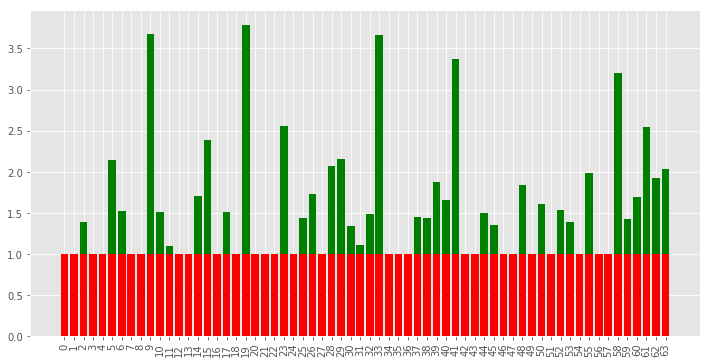

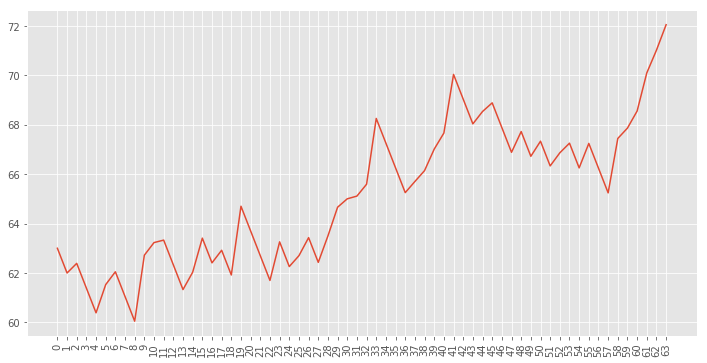

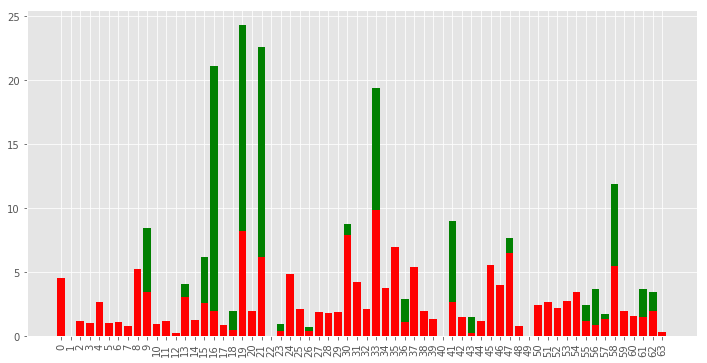

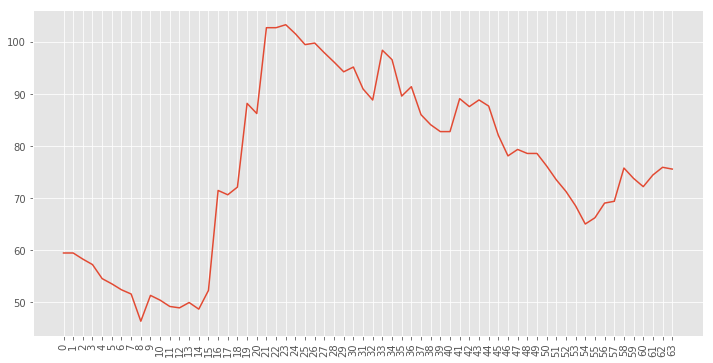

In [20]:
home_model = get_home(calibration="sigmoid", X=X, y=fix_label(y, 1), n_estimators=2000)
draw_model = get_draw(calibration="sigmoid", X=X, y=fix_label(y, 0), n_estimators=2000)
away_model = get_away(calibration="sigmoid", X=X, y=fix_label(y, -1), n_estimators=2000)

tournament_template = pd.read_csv(tournament_template_file)
match_bets = pd.read_csv(match_bet_file)
predictor = OneVsRestPredictor(home_model, draw_model, away_model)
wc2010 = get_tournament_simulation_results(tournament_template, predictor, match_bets[["1", "X", "2"]].values)

tmp = {}
tmp["simulation"] = wc2010[0]
tmp["unit"] = wc2010[1]
tmp["kelly"] = wc2010[2]
results["WC2010_sigmoid"] = tmp

plot_simulation(tmp)

Model type: Home, model calibration: isotonic, parameters: {'oob_score': True, 'bootstrap': True, 'n_jobs': -1, 'n_estimators': 2000, 'max_depth': 8, 'min_samples_leaf': 10, 'max_features': 'sqrt'}
Model type: Draw, model calibration: isotonic, parameters: {'oob_score': True, 'bootstrap': True, 'n_jobs': -1, 'n_estimators': 2000, 'max_depth': 3, 'min_samples_leaf': 1, 'max_features': 'sqrt'}
Model type: Away, model calibration: isotonic, parameters: {'oob_score': True, 'bootstrap': True, 'n_jobs': -1, 'n_estimators': 2000, 'max_depth': 5, 'min_samples_leaf': 15, 'max_features': 'sqrt'}


/Users/villetoiviainen/Documents/dev/world_cup/bet/kelly_strategy.py:12: RuntimeWarning: invalid value encountered in log
  return -(p1 * np.log(1 + o1*a - b - c) + p2 * np.log(1 + o2*b - a - c) + p3*np.log(1 + o3*c - a - b))


Accuracy: 0.5625


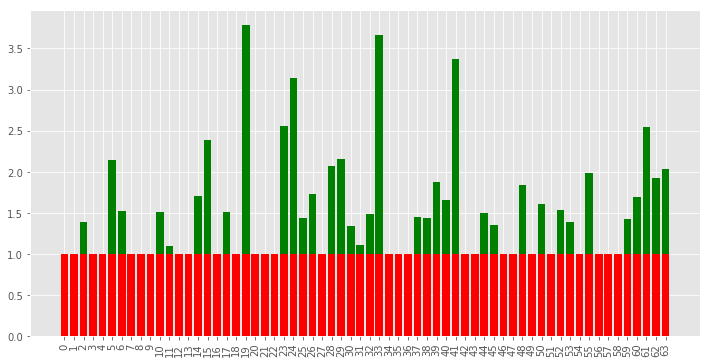

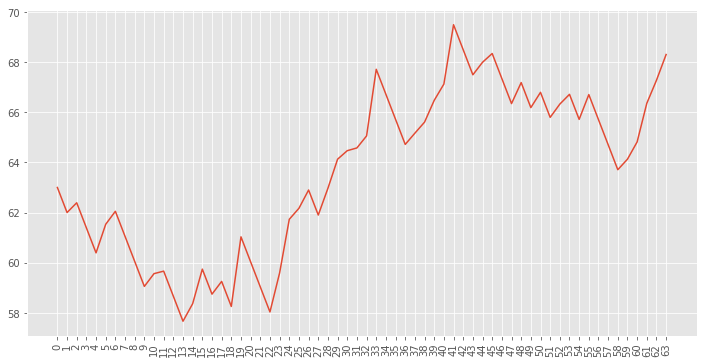

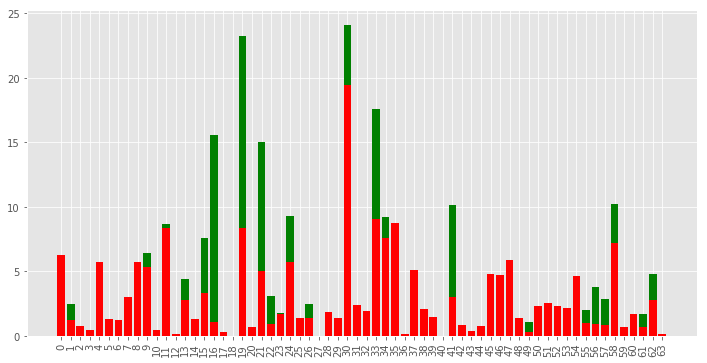

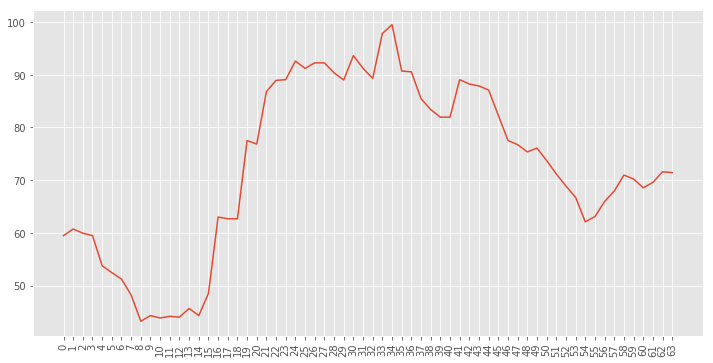

In [21]:
home_model = get_home(calibration="isotonic", X=X, y=fix_label(y, 1), n_estimators=2000)
draw_model = get_draw(calibration="isotonic", X=X, y=fix_label(y, 0), n_estimators=2000)
away_model = get_away(calibration="isotonic", X=X, y=fix_label(y, -1), n_estimators=2000)

tournament_template = pd.read_csv(tournament_template_file)
match_bets = pd.read_csv(match_bet_file)
predictor = OneVsRestPredictor(home_model, draw_model, away_model)
wc2010 = get_tournament_simulation_results(tournament_template, predictor, match_bets[["1", "X", "2"]].values)

tmp = {}
tmp["simulation"] = wc2010[0]
tmp["unit"] = wc2010[1]
tmp["kelly"] = wc2010[2]
results["WC2010_isotonic"] = tmp

plot_simulation(tmp)

In [27]:
from sklearn.metrics import accuracy_score
for key, data in results.items():
    print(key)
    print("Accuracy:", accuracy_score(data["simulation"]["true_outcome"], data["simulation"]["outcome"]))
    print("Unit", data["unit"].get_total_profit())
    print("Kelly", data["kelly"].get_total_profit())
    print()


WC2018
Accuracy: 0.578125
Unit 1.0765625
Kelly 0.990854441854

WC2018_sigmoid
Accuracy: 0.578125
Unit 1.0765625
Kelly 1.01156094752

WC2018_isotonic
Accuracy: 0.578125
Unit 1.0765625
Kelly 0.983866381234

WC2014
Accuracy: 0.609375
Unit 1.15765625
Kelly 1.03811555834

WC2014_sigmoid
Accuracy: 0.578125
Unit 1.07953125
Kelly 1.00529270727

WC2014_isotonic
Accuracy: 0.59375
Unit 1.12296875
Kelly 1.04106186848

WC2010
Accuracy: 0.578125
Unit 1.125625
Kelly 1.28934715723

WC2010_sigmoid
Accuracy: 0.578125
Unit 1.125625
Kelly 1.18032211497

WC2010_isotonic
Accuracy: 0.5625
Unit 1.06734375
Kelly 1.11607162884

